<a href="https://colab.research.google.com/github/Devsah9051/DIABETES-USING-SVM-ML-ALGO/blob/main/DIABETES_PREDICTION_with_handling_outlier's_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIABETES PREDICTION USING SVM(SUPPORT VECTOR MACHINE):

In [1]:
# Import the important libraries here :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


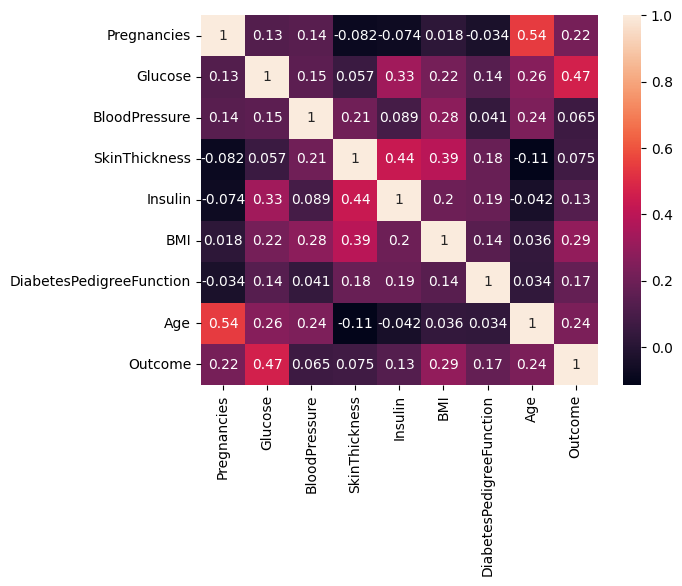

In [8]:
df_graph=sns.heatmap(df.corr(),annot=True)

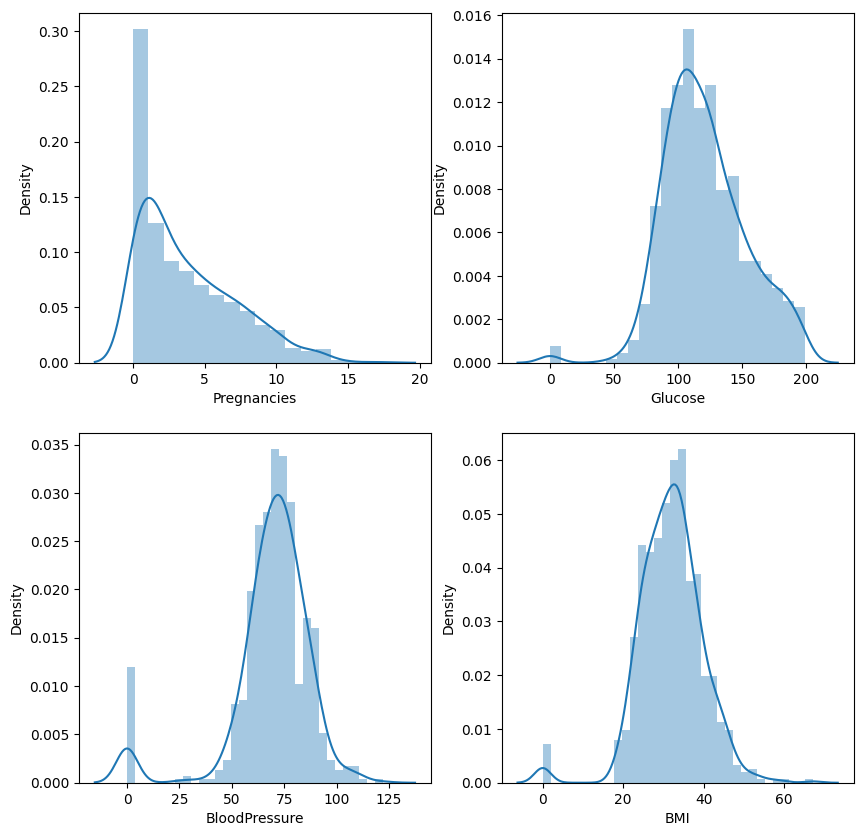

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Pregnancies'])
plt.subplot(2,2,2)
sns.distplot(df['Glucose'])
plt.subplot(2,2,3)
sns.distplot(df['BloodPressure'])
plt.subplot(2,2,4)
sns.distplot(df['BMI'])
plt.show()

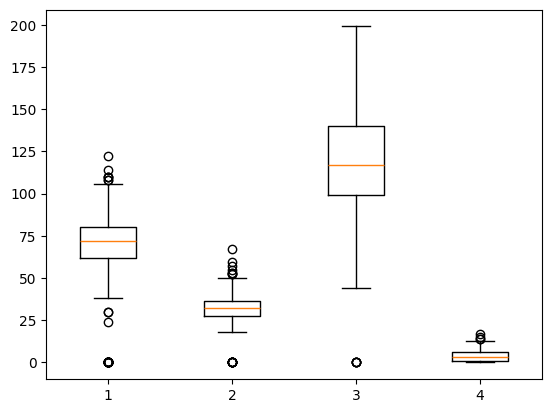

In [10]:
plt.boxplot(df[['BloodPressure','BMI','Glucose','Pregnancies']].values)
plt.show()

In [62]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())
df.head()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
from scipy.stats import zscore
cols=['BloodPressure','BMI','Glucose','Pregnancies']

z_scores = df[cols].apply(zscore)
df_clapped=df.copy()
for col in cols:

  mean=df_clapped[col].mean()
  std=df_clapped[col].std()
  upper_limit=mean+3*std
  lower_limit=mean-3*std
  df_clapped[cols]=np.where(df_clapped[cols]>=upper_limit,upper_limit,np.where(df_clapped[cols]<=lower_limit,lower_limit,df_clapped[cols]))


In [64]:
df_clapped.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,46.91185,46.91185,46.91185,35,30.5,46.91185,0.627,50,1
1,46.91185,46.91185,46.91185,29,30.5,46.91185,0.351,31,0
2,46.91185,46.91185,46.91185,23,30.5,46.91185,0.672,32,1
3,46.91185,46.91185,46.91185,23,94.0,46.91185,0.167,21,0
4,46.91185,46.91185,46.91185,35,168.0,46.91185,2.288,33,1


In [65]:
df_clapped.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000
mean,4.691185e+01,4.691185e+01,4.691185e+01,27.334635,94.652344,4.691185e+01,0.471876,33.240885,0.348958
std,3.555029e-13,6.964548e-13,6.931375e-13,9.229014,105.547598,3.870454e-13,0.331329,11.760232,0.476951
min,4.691185e+01,4.691185e+01,4.691185e+01,7.000000,14.000000,4.691185e+01,0.078000,21.000000,0.000000
25%,4.691185e+01,4.691185e+01,4.691185e+01,23.000000,30.500000,4.691185e+01,0.243750,24.000000,0.000000
50%,4.691185e+01,4.691185e+01,4.691185e+01,23.000000,31.250000,4.691185e+01,0.372500,29.000000,0.000000
75%,4.691185e+01,4.691185e+01,4.691185e+01,32.000000,127.250000,4.691185e+01,0.626250,41.000000,1.000000
max,4.691185e+01,4.691185e+01,4.691185e+01,99.000000,846.000000,4.691185e+01,2.420000,81.000000,1.000000


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X=df_clapped.drop('Outcome',axis=1)
Y=df_clapped['Outcome']

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [70]:
from sklearn.svm import SVC

In [71]:
model=SVC(kernel='rbf')
y_predict=model.fit(X_train,Y_train)

In [72]:
y_predict

SVC()

In [73]:
y_predict=model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
model_score=accuracy_score(Y_test,y_predict)
print("This is the model accuracy :",model_score*100)

This is the model accuracy : 66.88311688311688
